# CSE474/574 - Programming Assignment 2

## Part 2 - Image Classification

Additional library requirement: `Pillow`. See [here](https://anaconda.org/anaconda/pillow) for installation instructions.

For this part, we will use `keras` with a `tensorflow` backend, instead of directly using `tensorflow`, as in Part 1. See [here](https://anaconda.org/conda-forge/keras) for installation instructions.

In [1]:
from __future__ import print_function
from keras.models import Sequential
from keras.layers import Dense, Activation

import numpy as np
import random as rd
import time
import pickle
import os
from PIL import Image
#os.environ["CUDA_VISIBLE_DEVICES"]="1"
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
def resize_images(data,size):

    '''
    Resize images in a given data matrix (1 per row) to the specified size in the tuple - size.
    '''
    resized_data = np.empty((data.shape[0],size[0]*size[1]))
    for i in range(data.shape[0]):
        d = (np.array(Image.fromarray(data[i,:].reshape((28,28))).resize(size))).flatten()
        resized_data[i,:] = d
    
    return resized_data      

In [3]:
classes = ['apple', 'airplane', 'basketball', 'axe', 'banana', 'horse', 'arm', 'alarm clock', 'ant', 'bed']

In [14]:
# Preparing the data set
with open('AI_quick_draw.pickle', 'rb') as open_ai_quick:
    data_train = pickle.load(open_ai_quick)
    data_train = resize_images(data_train,(20,20))
    label_train1 = pickle.load(open_ai_quick)
    data_test = pickle.load(open_ai_quick)
    data_test = resize_images(data_test,(20,20))
    label_test1 = pickle.load(open_ai_quick)
n_classes = len(np.unique(label_train1))
# convert labels to 0-1 hot encoding
label_train = np.zeros((label_train1.shape[0], n_classes))
a = np.arange(label_train1.shape[0], dtype=np.int64)
b = np.array(label_train1, dtype=np.int64).reshape((label_train1.shape[0],))
label_train[a, b] = 1

label_test = np.zeros((label_test1.shape[0], n_classes))
c = np.arange(label_test1.shape[0], dtype=np.int64)
d = np.array(label_test1, dtype=np.int64).reshape((label_test1.shape[0],))
label_test[c, d] = 1

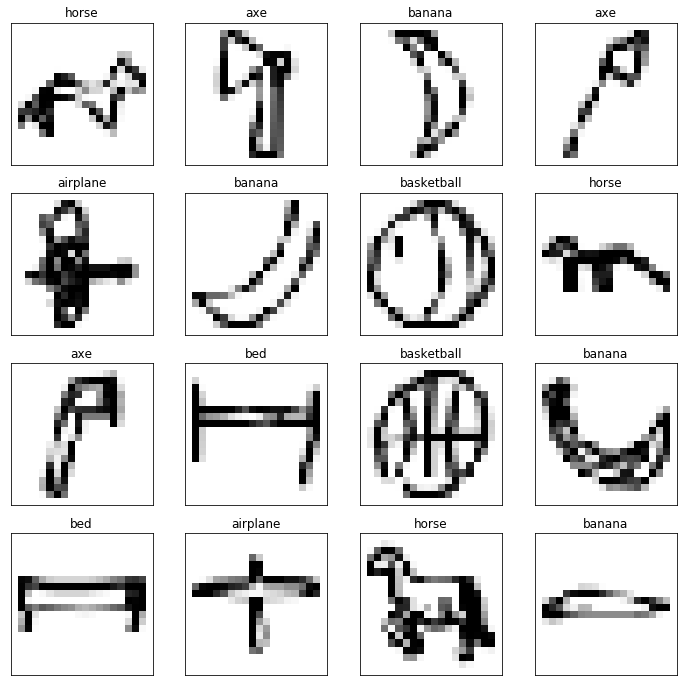

In [15]:
# visualize some images
fig = plt.figure(figsize=[12,12])
for i in range(16):
    ax = plt.subplot(4,4,i+1)    
    ind = np.random.randint(0,data_train.shape[0])
    plt.imshow(data_train[ind,:].reshape((20,20)),cmap='Greys')
    plt.xticks([])
    plt.yticks([])
    t = plt.title(classes[int(label_train1[ind])])

In [16]:
# for some macosx installations, conflicting copies of mpilib causes trouble with tensorflow.
# use the following two lines to resolve that issue
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

**WARNING**: This cell will take a significantly long time to run

In [17]:
import time

In [19]:
start_time = time.time()
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=data_train.shape[1]))
# you can add more Dense layers here
# model.add(Dense(256, activation='relu')) 
# model.add(Dense(256, activation='relu')) 
# model.add(Dense(256, activation='relu')) 
# model.add(Dense(256, activation='relu')) 
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(data_train, label_train, epochs=500, batch_size=32)
duration = time.time() - start_time
predict_train = model.predict_classes(data_train)
acc_train = np.where(label_train1 == predict_train)[0].shape[0]/data_train.shape[0]
print('Training accuracy {}'.format(acc_train))
predict_test = model.predict_classes(data_test)
acc_test = np.where(label_test1 == predict_test)[0].shape[0]/data_test.shape[0]
print('Testing accuracy {}'.format(acc_test))
print('Time elapsed - {} seconds.'.format(duration))

Epoch 1/500
100000/100000 [==============================] - 10s 101us/step - loss: 8.5626 - acc: 0.4642
Epoch 2/500
100000/100000 [==============================] - 7s 69us/step - loss: 7.5545 - acc: 0.5284
Epoch 3/500
100000/100000 [==============================] - 6s 61us/step - loss: 7.2726 - acc: 0.5465
Epoch 4/500
100000/100000 [==============================] - 6s 61us/step - loss: 7.1099 - acc: 0.5568
Epoch 5/500
100000/100000 [==============================] - 6s 61us/step - loss: 6.8602 - acc: 0.5725
Epoch 6/500
100000/100000 [==============================] - 6s 62us/step - loss: 6.7289 - acc: 0.5805
Epoch 7/500
100000/100000 [==============================] - 7s 66us/step - loss: 6.5741 - acc: 0.5904
Epoch 8/500
100000/100000 [==============================] - 6s 61us/step - loss: 6.6354 - acc: 0.5865
Epoch 9/500
100000/100000 [==============================] - 6s 61us/step - loss: 6.4816 - acc: 0.5960
Epoch 10/500
100000/100000 [==============================] - 6s 61us/s

100000/100000 [==============================] - 11s 113us/step - loss: 5.3984 - acc: 0.6643
Epoch 80/500
100000/100000 [==============================] - 12s 125us/step - loss: 5.4252 - acc: 0.6626
Epoch 81/500
100000/100000 [==============================] - 7s 66us/step - loss: 5.4248 - acc: 0.6627
Epoch 82/500
100000/100000 [==============================] - 7s 69us/step - loss: 5.4206 - acc: 0.6630
Epoch 83/500
100000/100000 [==============================] - 7s 66us/step - loss: 5.3751 - acc: 0.6656
Epoch 84/500
100000/100000 [==============================] - 7s 67us/step - loss: 5.4014 - acc: 0.6641
Epoch 85/500
100000/100000 [==============================] - 7s 68us/step - loss: 5.3387 - acc: 0.6679
Epoch 86/500
100000/100000 [==============================] - 9s 90us/step - loss: 5.3498 - acc: 0.6674
Epoch 87/500
100000/100000 [==============================] - 7s 65us/step - loss: 5.3371 - acc: 0.6681
Epoch 88/500
100000/100000 [==============================] - 7s 67us/ste

100000/100000 [==============================] - 8s 75us/step - loss: 5.1081 - acc: 0.6825
Epoch 158/500
100000/100000 [==============================] - 8s 80us/step - loss: 5.1304 - acc: 0.6811
Epoch 159/500
100000/100000 [==============================] - 8s 77us/step - loss: 5.1095 - acc: 0.6824
Epoch 160/500
100000/100000 [==============================] - 8s 78us/step - loss: 5.1035 - acc: 0.6828
Epoch 161/500
100000/100000 [==============================] - 8s 76us/step - loss: 5.0960 - acc: 0.6833
Epoch 162/500
100000/100000 [==============================] - 8s 84us/step - loss: 5.1426 - acc: 0.6804
Epoch 163/500
100000/100000 [==============================] - 8s 80us/step - loss: 5.1147 - acc: 0.6822
Epoch 164/500
100000/100000 [==============================] - 8s 79us/step - loss: 5.1313 - acc: 0.6811
Epoch 165/500
100000/100000 [==============================] - 8s 84us/step - loss: 5.1132 - acc: 0.6823
Epoch 166/500
100000/100000 [==============================] - 8s 79u

100000/100000 [==============================] - 8s 82us/step - loss: 4.9604 - acc: 0.6918
Epoch 236/500
100000/100000 [==============================] - 9s 91us/step - loss: 4.9782 - acc: 0.6906
Epoch 237/500
100000/100000 [==============================] - 9s 90us/step - loss: 4.9655 - acc: 0.6915
Epoch 238/500
100000/100000 [==============================] - 9s 87us/step - loss: 4.9778 - acc: 0.6906
Epoch 239/500
100000/100000 [==============================] - 9s 85us/step - loss: 4.9805 - acc: 0.6905
Epoch 240/500
100000/100000 [==============================] - 9s 89us/step - loss: 5.0264 - acc: 0.6877
Epoch 241/500
100000/100000 [==============================] - 9s 92us/step - loss: 5.0043 - acc: 0.6890
Epoch 242/500
100000/100000 [==============================] - 9s 87us/step - loss: 5.0073 - acc: 0.6888
Epoch 243/500
100000/100000 [==============================] - 9s 90us/step - loss: 4.9723 - acc: 0.6911
Epoch 244/500
100000/100000 [==============================] - 9s 89u

100000/100000 [==============================] - 10s 103us/step - loss: 4.8870 - acc: 0.6963
Epoch 312/500
100000/100000 [==============================] - 9s 92us/step - loss: 4.8749 - acc: 0.6971
Epoch 313/500
100000/100000 [==============================] - 9s 93us/step - loss: 4.8601 - acc: 0.6980
Epoch 314/500
100000/100000 [==============================] - 10s 97us/step - loss: 4.8473 - acc: 0.6989
Epoch 315/500
100000/100000 [==============================] - 10s 95us/step - loss: 4.8678 - acc: 0.6976
Epoch 316/500
100000/100000 [==============================] - 10s 100us/step - loss: 4.8641 - acc: 0.6978
Epoch 317/500
100000/100000 [==============================] - 10s 105us/step - loss: 4.8781 - acc: 0.6970
Epoch 318/500
100000/100000 [==============================] - 10s 100us/step - loss: 4.8871 - acc: 0.6965
Epoch 319/500
100000/100000 [==============================] - 10s 99us/step - loss: 4.8823 - acc: 0.6967
Epoch 320/500
100000/100000 [=============================

100000/100000 [==============================] - 10s 102us/step - loss: 4.8508 - acc: 0.6986
Epoch 388/500
100000/100000 [==============================] - ETA: 0s - loss: 4.8419 - acc: 0.699 - 11s 107us/step - loss: 4.8412 - acc: 0.6993
Epoch 389/500
100000/100000 [==============================] - 11s 113us/step - loss: 4.8374 - acc: 0.6995
Epoch 390/500
100000/100000 [==============================] - 11s 106us/step - loss: 4.8331 - acc: 0.6998
Epoch 391/500
100000/100000 [==============================] - 11s 110us/step - loss: 4.8513 - acc: 0.6986
Epoch 392/500
100000/100000 [==============================] - 11s 105us/step - loss: 4.8385 - acc: 0.6995
Epoch 393/500
100000/100000 [==============================] - 11s 110us/step - loss: 4.8242 - acc: 0.7003
Epoch 394/500
100000/100000 [==============================] - 12s 121us/step - loss: 4.8255 - acc: 0.7003
Epoch 395/500
100000/100000 [==============================] - 9s 93us/step - loss: 4.8093 - acc: 0.7013
Epoch 396/500
1

100000/100000 [==============================] - 10s 103us/step - loss: 4.7986 - acc: 0.7019
Epoch 464/500
100000/100000 [==============================] - 10s 100us/step - loss: 4.8062 - acc: 0.7015
Epoch 465/500
100000/100000 [==============================] - 10s 99us/step - loss: 4.8195 - acc: 0.7006
Epoch 466/500
100000/100000 [==============================] - 11s 108us/step - loss: 4.8124 - acc: 0.7011
Epoch 467/500
100000/100000 [==============================] - 10s 97us/step - loss: 4.7802 - acc: 0.7031
Epoch 468/500
100000/100000 [==============================] - 10s 98us/step - loss: 4.7809 - acc: 0.7031
Epoch 469/500
100000/100000 [==============================] - 10s 104us/step - loss: 4.7927 - acc: 0.7024
Epoch 470/500
100000/100000 [==============================] - 10s 98us/step - loss: 4.8209 - acc: 0.7005
Epoch 471/500
100000/100000 [==============================] - 10s 100us/step - loss: 4.8275 - acc: 0.7001
Epoch 472/500
100000/100000 [==========================

In [22]:
predict_train = model.predict_classes(data_train)
acc_train = np.where(label_train1 == predict_train)[0].shape[0]/data_train.shape[0]
print('Training accuracy {}'.format(acc_train))

Training accuracy 0.1


In [18]:
# save the model to use with the drawing app (this will be released later)
model.save('pa2-part2-model.h5')